# Testing nilearn carpet plots with atlases

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from nilearn import datasets, image, masking, plotting

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
adhd_dataset = datasets.fetch_adhd(n_subjects=12)
func = adhd_dataset.func[1]

# Print basic information on the dataset
print('First subject functional nifti image (4D) is at: %s' %
      func)  # 4D data

First subject functional nifti image (4D) is at: /Users/taylor/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz


/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/func.py:458: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


In [3]:
# Build an EPI-based mask because we have no anatomical data
mask_img = masking.compute_epi_mask(func)

<ipython-input-4-0874873009a3>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


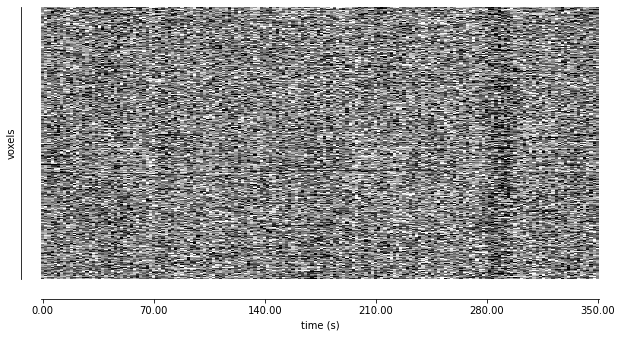

In [4]:
display = plotting.plot_carpet(func, mask_img)
display.show()

<ipython-input-5-f743198620c9>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


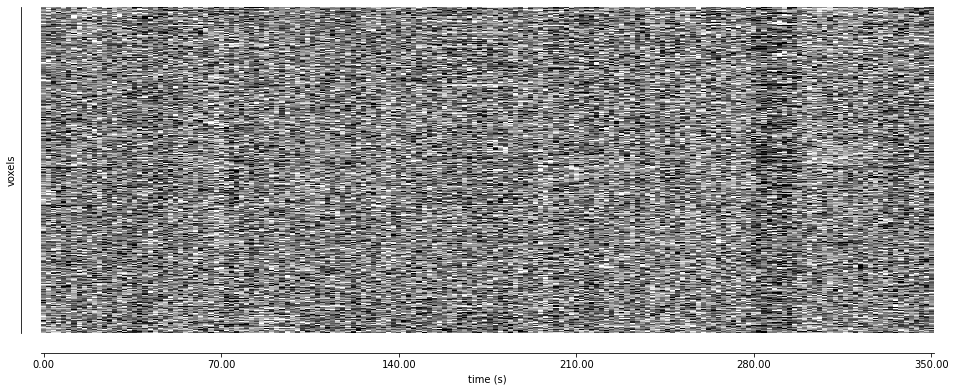

In [5]:
fig, ax = plt.subplots(figsize=(16, 6))
ax = plotting.plot_carpet(func, mask_img, axes=ax)
fig.show()

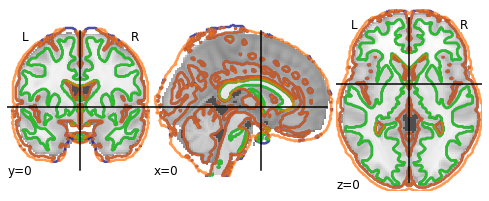

In [6]:
atlas = datasets.fetch_icbm152_2009()
atlas_img = image.concat_imgs((atlas["gm"], atlas["wm"], atlas["csf"]))
map_labels = {"gm": 1, "wm": 2, "csf": 3}

atlas_data = atlas_img.get_fdata()
discrete_version = np.argmax(atlas_data, axis=3) + 1
discrete_version[np.max(atlas_data, axis=3) == 0] = 0
discrete_atlas_img = nib.Nifti1Image(discrete_version, atlas_img.affine, atlas_img.header)
plotting.plot_roi(discrete_atlas_img, view_type="contours")

/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:519: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/plotting/img_plotting.py:1994: UserWarning: 11783/81989 bad voxels identified. Dropping.
  warnings.warn(f"{n_bad_voxels}/{data.shape[1]} bad voxels identified. Dropping.")
<ipython-input-7-f8632f892853>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


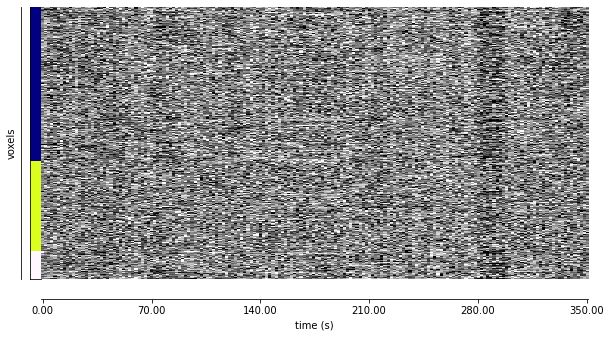

In [7]:
%time
display = plotting.plot_carpet(func, discrete_atlas_img)
display.show()

/Users/taylor/Documents/tsalo/nilearn/nilearn/image/resampling.py:519: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/taylor/Documents/tsalo/nilearn/nilearn/plotting/img_plotting.py:1994: UserWarning: 11783/81989 bad voxels identified. Dropping.
  warnings.warn(f"{n_bad_voxels}/{data.shape[1]} bad voxels identified. Dropping.")


Processing 1.0: 39646 voxels
Processing 2.0: 23290 voxels
Flipping 2.0
Processing 3.0: 7270 voxels


<ipython-input-8-3e10b632ea59>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


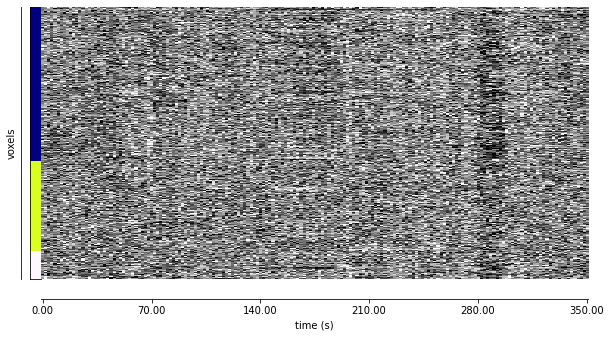

In [8]:
%time
display = plotting.plot_carpet(func, discrete_atlas_img, ordering="hierarchical")
display.show()